In [215]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import pandas as pd
import seaborn as sns
import numpy as np
import xgboost as xgb
import pickle


# This is study notebook dedicated for sklean preprocessing 

In [72]:
""" Use the house prices dataset for this studynote """

source_dataset = pd.read_csv("../data/House_Price.csv", header=0)

In [4]:
def minimize_dataset(df):
    """ 
    Return a minimized version of the data, 
    to make easy to expirement with feature transformation 
    """

    new_df = pd.DataFrame()

    new_df['price'] = df.price

    # Add new number of hotel rooms to the new df
    new_df['n_hot_rooms'] = df.n_hot_rooms
    
    # Filling missing value in n_hos_beds
    new_df['n_hos_beds'] = df.n_hos_beds

    # Transform the inversely proportional functoin into a liner function using log
    new_df['crime_rate'] = df.crime_rate

    new_df['room_num'] = df.room_num
    new_df['teachers'] = df.teachers
    new_df['waterbody'] = df.waterbody
    
    # Convert categorical variables to dummy variables
    #new_df = pd.get_dummies(new_df, drop_first=True)

    return new_df

In [73]:
source_dataset.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [74]:
df = minimize_dataset(source_dataset)
df.head()

,price,n_hot_rooms,n_hos_beds,crime_rate,room_num,teachers,waterbody
0,24.0,11.1920,5.480,0.00632,6.575,24.7,River
1,21.6,12.1728,7.332,0.02731,6.421,22.2,Lake
2,34.7,101.1200,7.394,0.02729,7.185,22.2,None
3,33.4,11.2672,9.268,0.03237,6.998,21.3,Lake
4,36.2,11.2896,8.824,0.06905,7.147,21.3,Lake


In [75]:
# Prep the data for training and prediction
if 'price' in df: 
    y = df.pop('price')

if 'waterbody' in df:
    df.pop('waterbody')

In [77]:
df.describe()

,n_hot_rooms,n_hos_beds,crime_rate,room_num,teachers
count,506.000000,498.000000,506.000000,506.000000,506.000000
mean,13.041605,7.899767,3.613524,6.284634,21.544466
std,5.238957,1.476683,8.601545,0.702617,2.164946
min,10.057600,5.268000,0.006320,3.561000,18.000000
25%,11.189800,6.634500,0.082045,5.885500,19.800000
50%,12.720000,7.999000,0.256510,6.208500,20.950000
75%,14.170800,9.088000,3.677083,6.623500,22.600000
max,101.120000,10.876000,88.976200,8.780000,27.400000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   n_hot_rooms  506 non-null    float64
 1   n_hos_beds   498 non-null    float64
 2   crime_rate   506 non-null    float64
 3   room_num     506 non-null    float64
 4   teachers     506 non-null    float64
dtypes: float64(5)
memory usage: 19.9 KB


In [55]:
for c, b, in enumerate(df.n_hos_beds.isnull().values):
    if b == True:
        print(df.n_hos_beds[c])


nan
nan
nan
nan
nan
nan
nan
nan


In [59]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df[['n_hos_beds']])
df['n_hos_beds'] = imp.transform(df[['n_hos_beds']])

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   n_hot_rooms  506 non-null    float64
 1   n_hos_beds   506 non-null    float64
 2   crime_rate   506 non-null    float64
 3   room_num     506 non-null    float64
 4   teachers     506 non-null    float64
dtypes: float64(5)
memory usage: 19.9 KB


In [222]:
ts = [[('ta', 1), ('tb', 2), ('tc', 3)], [('za', 1), ('zb', 2), ('zc', 3)], [('za', 1), ('zb', 2), ('zc', 3)]]
es = [('est', 1), ('est', 2)]

pickle.dumps(ts)


pipelines = set()

for e in es:
    for t in ts:
        temp = t.copy()
        temp.append(e)
        pipelines.add(pickle.dumps(temp))

for p in pipelines:
    print(pickle.loads(p))

[('za', 1), ('zb', 2), ('zc', 3), ('est', 1)]
[('za', 1), ('zb', 2), ('zc', 3), ('est', 2)]
[('ta', 1), ('tb', 2), ('tc', 3), ('est', 2)]
[('ta', 1), ('tb', 2), ('tc', 3), ('est', 1)]


In [247]:
class Pipeline_Eval:
    def __init__(self, X_dataset, y_dataset):
        self.__pipelines = set()
        self.transformers = []
        self.estimators = []
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(df, y, test_size=0.2, random_state=42)
        return self
    
    
    def constructor(self):
        """Combine the treansfors and estiators list into pipelines"""
        for e in self.estimators:
            steps = self.transformers.copy()
            steps.append(e)
            print(steps)
            pipe = Pipeline(steps)
            print("Pipeline was created")
            print(pipe)
            self.__pipelines.add(pickle.dumps(pipe))



    def eval_pipeline(self, pipe):
        print("Eval Pipeline")
        pipe.fit(self.X_train, self.y_train)
        pred = pipe.predict(self.X_test)
        mae = mean_absolute_error(pred, self.y_test)
        print("PIpeline:")
        print(pipe)
        print(f"Mean Absolute Error {mae:.4f}")


    def add_pipeline(self, pipe):
        self.__pipelines.add(pickle.dumps(pipe))


    def fit_predict(self):
        for pipe in self.__pipelines:
            self.eval_pipeline(pickle.loads(pipe))

    

In [248]:
peval = Pipeline_Eval(df, y)

In [249]:
peval.transformers.append(('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='mean')))
peval.estimators.append(('linear_reg', LinearRegression()))
peval.constructor()
peval.fit_predict()

[('simple_imputer', SimpleImputer()), ('linear_reg', LinearRegression())]
Pipeline was created
Pipeline(steps=[('simple_imputer', SimpleImputer()),
                ('linear_reg', LinearRegression())])
Eval Pipeline
PIpeline:
Pipeline(steps=[('simple_imputer', SimpleImputer()),
                ('linear_reg', LinearRegression())])
Mean Absolute Error 3.8229


In [250]:
peval.estimators.append(('xgb_reg', xgb.XGBRFRegressor(max_depth=13, learning_rate=1.0)))

peval.constructor()
peval.fit_predict()



[('simple_imputer', SimpleImputer()), ('linear_reg', LinearRegression())]
Pipeline was created
Pipeline(steps=[('simple_imputer', SimpleImputer()),
                ('linear_reg', LinearRegression())])
[('simple_imputer', SimpleImputer()), ('xgb_reg', XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=13, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
      

In [251]:
peval.fit_predict()

Eval Pipeline
PIpeline:
Pipeline(steps=[('simple_imputer', SimpleImputer()),
                ('xgb_reg',
                 XGBRFRegressor(base_score=0.5, booster='gbtree',
                                callbacks=None, colsample_bylevel=1,
                                colsample_bytree=1, early_stopping_rounds=None,
                                enable_categorical=False, eval_metric=None,
                                feature_types=None, gamma=0, gpu_id=-1,
                                grow_policy='depthwise', importance_type=None,
                                interaction_constraints='', max_bin=256,
                                max_cat_threshold=64, max_cat_to_onehot=4,
                                max_delta_step=0, max_depth=13, max_leaves=0,
                                min_child_weight=1, missing=nan,
                                monotone_constraints='()', n_estimators=100,
                                n_jobs=0, num_parallel_tree=100,
                    

In [232]:
peval.add_pipeline(Pipeline([
    ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('lasso_regression', linear_model.Lasso(alpha=0.1))
]))

In [252]:
peval.estimators.append(('lasso_regression', linear_model.Lasso(alpha=0.1)))

In [253]:
peval.transformers.append(('standard_scaler', StandardScaler()))

In [255]:
peval.constructor()

[('simple_imputer', SimpleImputer()), ('standard_scaler', StandardScaler()), ('linear_reg', LinearRegression())]
Pipeline was created
Pipeline(steps=[('simple_imputer', SimpleImputer()),
                ('standard_scaler', StandardScaler()),
                ('linear_reg', LinearRegression())])
[('simple_imputer', SimpleImputer()), ('standard_scaler', StandardScaler()), ('xgb_reg', XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=13, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estima

In [256]:
peval.fit_predict()

Eval Pipeline
PIpeline:
Pipeline(steps=[('simple_imputer', SimpleImputer()),
                ('standard_scaler', StandardScaler()),
                ('lasso_regression', Lasso(alpha=0.1))])
Mean Absolute Error 3.8122
Eval Pipeline
PIpeline:
Pipeline(steps=[('simple_imputer', SimpleImputer()),
                ('standard_scaler', StandardScaler()),
                ('xgb_reg',
                 XGBRFRegressor(base_score=0.5, booster='gbtree',
                                callbacks=None, colsample_bylevel=1,
                                colsample_bytree=1, early_stopping_rounds=None,
                                enable_categorical=False, eval_metric=None,
                                feature_types=None, gamma=0, gpu_id=-1,
                                grow_policy='depthwise', importance_type=None,
                                interaction_constraints='', max_bin=256,
                                max_cat_threshold=64, max_cat_to_onehot=4,
                                ma

Standard Scaler
The standard scaler shift the data so that the mean is zero and the std deviation (unit variance) is one. 

## Simple example from https://scikit-learn.org/stable/modules/preprocessing.html



In [7]:
raw_data = np.array([[1., -1., 2.],
                [2.,  0., 0.],
                [0., 1., -1.]])

# Scaler is being fit to data 
scaler = preprocessing.StandardScaler().fit(raw_data)

print(f"Data mean: {scaler.mean_}")
print(f"Data scaler to adjust to zero mean: {scaler.scale_}")

# The scaler is used to transform the data
scaled_data = scaler.transform(raw_data)
print("Scaled data")
scaled_data

Data mean: [1.         0.         0.33333333]
Data scaler to adjust to zero mean: [0.81649658 0.81649658 1.24721913]
Scaled data


array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [8]:
# Use StandardScaler to normalized number of hospital beds
nor_hosp_beds = preprocessing.StandardScaler().fit_transform(df[['n_hos_beds']])

type(nor_hosp_beds)


hp.head()

,price,resid_area,room_num,teachers
0,24.0,32.31,6.575,24.7
1,21.6,37.07,6.421,22.2
2,34.7,37.07,7.185,22.2
3,33.4,32.18,6.998,21.3
4,36.2,32.18,7.147,21.3


In [19]:
# hp = house prices
# shp = scale house prices. It's imported to explicitly copy the data frame. 
# Otherwise pandas will use a view of the original data frame 
shp = hp.copy()
shp.loc[:, ('resid_area', 'room_num', 'teachers')] = scaler.fit_transform(
    shp[['resid_area', 'room_num', 'teachers']].to_numpy())

shp.head()

,price,resid_area,room_num,teachers
0,24.0,-1.287909,0.413672,1.459000
1,21.6,-0.593381,0.194274,0.303094
2,34.7,-0.593381,1.282714,0.303094
3,33.4,-1.306878,1.016303,-0.113032
4,36.2,-1.306878,1.228577,-0.113032


## Simple pipeline that use the standard scaler and classification problem 
source: https://scikit-learn.org/stable/modules/preprocessing.html

In [21]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [22]:
X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)


0.96

In [181]:
pipe = Pipeline([
    ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('standard_scaler', StandardScaler()),
    ('linear_reg', LinearRegression())
])
peval.eval_pipeline(pipe)

PIpeline:
Pipeline(steps=[('simple_imputer', SimpleImputer()),
                ('standard_scaler', StandardScaler()),
                ('linear_reg', LinearRegression())])
Mean Absolute Error 3.8229


### Standardize value range, scalling the feature to lie between minimum and a maximum using `MinMaxScaler` and `MaxAbsScaler`

The motivation for standardize to a range is to increase the effectiveness of data with small standard deviations and preserve zero enteries. 

In [24]:
raw_data

array([[ 1., -1.,  2.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.]])

In [36]:
min_max_scaler = preprocessing.MinMaxScaler()
raw_data_minmax_scaled = min_max_scaler.fit_transform(raw_data)
raw_data_minmax_scaled

# Why zero have two different value below? 

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [35]:
max_abs_scaler = preprocessing.MaxAbsScaler()
raw_data_maxabs_scaled = max_abs_scaler.fit_transform(raw_data)
raw_data_minmax_scaled

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [31]:
raw_data.min(axis=0)

array([ 0., -1., -1.])

### Standardize sparse data
Normalize sparse data to a center will destroy the sparseness struture of the data. However, it can be useful to scale sparse inputs if the feature are on different scales. 

If there is a need to scale sparse data, use the MaxAbsScaler or the StandardScaler with_mean = False

In [39]:
#todo learn what is sparse data and play with examples. 

sparse_data = np.array([[1., -1., 0., 0., 1., 0.],
                        [2.,  0., 0., 0., 0., 0.],
                        [0.,  1., 0., 0., 0., 1.],
                        [1.,  0., 0., 0., 0., 1.],
                        [0.,  1., 0., 0., 0., 0.]])


In [44]:
max_abs_scaler = preprocessing.MaxAbsScaler()
snd_scaler = preprocessing.StandardScaler(with_mean=False)

In [45]:
sparse_data_max_abs_scaled = max_abs_scaler.fit_transform(sparse_data)
sparse_data_max_abs_scaled

array([[ 0.5, -1. ,  0. ,  0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  0. ,  0. ,  1. ],
       [ 0. ,  1. ,  0. ,  0. ,  0. ,  0. ]])

In [46]:
sparse_data_snd_scaled = snd_scaler.fit_transform(sparse_data)
sparse_data_max_abs_scaled

array([[ 0.5, -1. ,  0. ,  0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  0. ,  0. ,  1. ],
       [ 0. ,  1. ,  0. ,  0. ,  0. ,  0. ]])

## Using RobustScaler to deal with outlier

Test data will by the number of hospital rooms in the house pricing dataset

In [48]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [64]:
hp2 = df[['price', 'n_hot_rooms', 'rainfall']].copy()

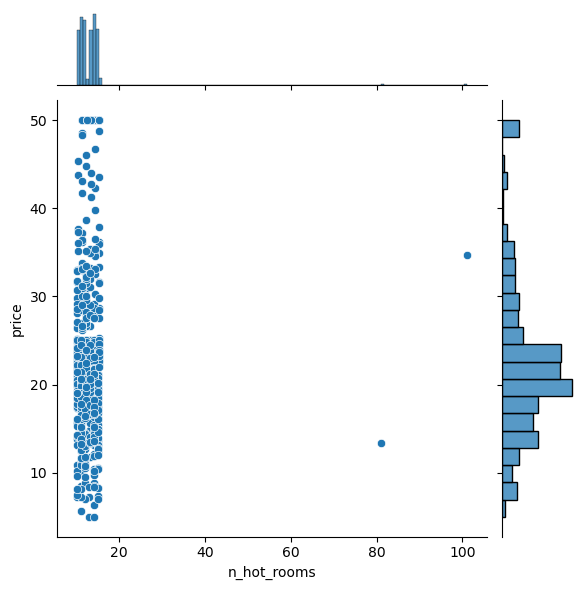

In [56]:
sns.jointplot(x='n_hot_rooms', y='price', data=hp2)

In [59]:
robust_scaler = preprocessing.RobustScaler(unit_variance=True)
hp2.loc[:, ('n_hot_rooms')] = robust_scaler.fit_transform(hp2[['n_hot_rooms']])

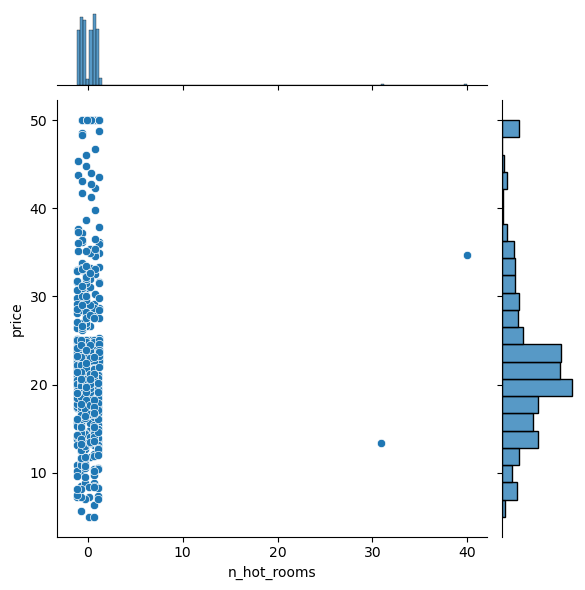

In [60]:
sns.jointplot(x='n_hot_rooms', y='price', data=hp2)

In [78]:
from sklearn.ensemble import IsolationForest
isf_perdiction = IsolationForest(random_state=0).fit_predict(hp2[['n_hot_rooms']])
#clf.predict(hp2[['n_hot_rooms']])
isf_perdiction

array([ 1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,
       -1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1

In [75]:
hp2[['n_hot_rooms']].max()

n_hot_rooms    101.12
dtype: float64

In [81]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=10)
lof_prediction = lof.fit_predict(hp2[['n_hot_rooms']])
lof_prediction

array([ 1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1

In [84]:
hot_rooms = hp2[['n_hot_rooms']].copy()

In [103]:
def is_outlier(X, mean, std, std_from_mean = 2):
    if X > (mean + (std * std_from_mean)) or X < (mean - (std * std_from_mean)):
        return -1
    else:
        return 1

In [106]:
hot_rooms['n_hot_rooms']

0       11.1920
1       12.1728
2      101.1200
3       11.2672
4       11.2896
         ...   
501     12.1792
502     13.1648
503     12.1912
504     15.1760
505     10.1520
Name: n_hot_rooms, Length: 506, dtype: float64

In [107]:
X = hot_rooms['n_hot_rooms'][2]
mean = hot_rooms['n_hot_rooms'].mean()
std = hot_rooms['n_hot_rooms'].std()

print(f" X: {X}, mean: {mean}, std: {std}")

is_outlier(
    X=X, 
    mean=mean, 
    std=std)

 X: 101.12, mean: 13.041604743083003, std: 5.238956632876972


-1

In [116]:
mean = hot_rooms['n_hot_rooms'].mean()
std = hot_rooms['n_hot_rooms'].std()

hot_rooms['is_outlier'] = hot_rooms.apply(lambda x: is_outlier(
    X = x['n_hot_rooms'],
    mean = x.mean(),
    std = x.std()
), axis=1)

In [123]:
hot_rooms['local_outlier'] = lof_prediction.tolist()

In [132]:
hot_rooms['isolation_forest'] = isf_perdiction.tolist()

In [125]:
from sklearn.metrics import accuracy_score
accuracy_score(hot_rooms['is_outlier'], hot_rooms['local_outlier'])

0.8774703557312253

In [134]:
accuracy_score(hot_rooms['is_outlier'], hot_rooms['isolation_forest'])

0.7470355731225297

In [147]:
lof = LocalOutlierFactor(n_neighbors=100, algorithm='brute')
lof_prediction = lof.fit_predict(hp2[['n_hot_rooms']])
accuracy_score(hot_rooms['is_outlier'], lof_prediction.tolist())

1.0

In [148]:
from sklearn.covariance import EllipticEnvelope

In [172]:
cov = EllipticEnvelope(contamination=0.0001, assume_centered=True).fit(hp2[['n_hot_rooms']])
#accuracy_score(hot_rooms['is_outlier'], cov_prediction.tolist())

In [173]:
cov.covariance_

array([[164.91485257]])

In [162]:
hot_rooms['covariance_outlier'] = cov_prediction.tolist()
hot_rooms.head(5)

,n_hot_rooms,is_outlier,local_outlier,isolation_forest,covariance_outlier
0,11.1920,1,1,1,1
1,12.1728,1,1,1,1
2,101.1200,-1,-1,-1,-1
3,11.2672,1,1,1,1
4,11.2896,1,1,-1,1


In [163]:
hot_rooms[hot_rooms.is_outlier != hot_rooms.covariance_outlier]

,n_hot_rooms,is_outlier,local_outlier,isolation_forest,covariance_outlier
423,81.12,-1,-1,-1,1


In [168]:
hot_rooms[hot_rooms.is_outlier == -1] 

,n_hot_rooms,is_outlier,local_outlier,isolation_forest,covariance_outlier
2,101.12,-1,-1,-1,-1
423,81.12,-1,-1,-1,1
